In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Import des données

In [2]:
data_train=pd.read_csv("train.csv")
data_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
data_train.describe(include = "all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [4]:
data_test=pd.read_csv("test.csv")
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
data_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
data_train.keyword.isna().sum()

61

In [7]:
data_train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
data_train.keyword.value_counts(normalize= True)

fatalities               0.005959
deluge                   0.005561
armageddon               0.005561
sinking                  0.005429
body%20bags              0.005429
                           ...   
forest%20fire            0.002516
epicentre                0.001589
threat                   0.001457
inundation               0.001324
radiation%20emergency    0.001192
Name: keyword, Length: 221, dtype: float64

In [0]:
keyword_disaster=data_train[data_train["target"] == 1].dropna()
keyword_no_disaster=data_train[data_train["target"] == 0].dropna()

In [10]:
keyword_no_disaster.head()

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0


In [11]:
data_train[["keyword","text"]][data_train["target"] == 1].dropna()

,keyword,text
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...
37,ablaze,INEC Office in Abia Set Ablaze - http://t.co/3...
38,ablaze,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46,ablaze,How the West was burned: Thousands of wildfire...
...,...,...
7542,wreckage,Wreckage 'conclusively confirmed' as from miss...
7543,wreckage,Wreckage 'Conclusively Confirmed' as From MH37...
7552,wrecked,Israel wrecked my home. Now it wants my land. ...
7559,wrecked,300K exotic car wrecked in train accident \nht...


In [12]:
keyword_disaster.keyword.value_counts(normalize=True)

outbreak                 0.013661
wreckage                 0.012750
oil%20spill              0.012295
collision                0.011840
buildings%20on%20fire    0.011384
                           ...   
screaming                0.000455
epicentre                0.000455
electrocute              0.000455
crush                    0.000455
blazing                  0.000455
Name: keyword, Length: 218, dtype: float64

In [13]:
keyword_no_disaster.keyword.value_counts(normalize=True)

armageddon      0.009709
ruin            0.009362
harm            0.009015
fear            0.008669
upheaval        0.008669
                  ...   
bioterrorism    0.000693
rescuers        0.000347
outbreak        0.000347
typhoon         0.000347
bombing         0.000347
Name: keyword, Length: 215, dtype: float64

In [14]:
keyword_no_disaster[keyword_no_disaster.keyword.str.contains("armageddon")]

,id,keyword,location,text,target
304,446,armageddon,"California, United States",#PBBan (Temporary:300) avYsss @'aRmageddon | D...,0
305,447,armageddon,"California, United States",#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0
306,448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups &gt;&gt; https://...,0
309,452,armageddon,"Alphen aan den Rijn, Holland",Bed time. Don't wake me up unless revolution o...,0
311,454,armageddon,Wrigley Field,@KatieKatCubs you already know how this shit g...,0
313,456,armageddon,probably the strip club,//im gonna beat armageddon as Hsu Hao ????\nju...,0
314,457,armageddon,Canada,@ENews Ben Affleck......I know there's a wife/...,0
315,459,armageddon,England,'If I'd have had a long coat to hand I'd have ...,0
316,461,armageddon,USA,YOUR PHONE IS SPYING ON YOU! Hidden Back Door ...,0
319,465,armageddon,"California, United States",#PBBan (Temporary:300) fighterdena @'aRmageddo...,0


In [0]:
keyword=data_train.keyword.dropna()

In [16]:
keyword

31       ablaze
32       ablaze
33       ablaze
34       ablaze
35       ablaze
         ...   
7578    wrecked
7579    wrecked
7580    wrecked
7581    wrecked
7582    wrecked
Name: keyword, Length: 7552, dtype: object

In [17]:
data_train[data_train.text.str.contains("11-Year-Old")]

,id,keyword,location,text,target
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


In [18]:
data_train.location.value_counts()

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
Û¢ Views From The Six Û¢         1
Pro-American and Anti-#Occupy      1
QLD Australia                      1
SoDak                              1
az                                 1
Name: location, Length: 3341, dtype: int64

In [19]:
data_train = data_train.drop_duplicates(subset="text")
data_train.describe(include="all")

,id,keyword,location,text,target
count,7503.000000,7447,5021,7503,7503.000000
unique,NaN,221,3327,7503,NaN
top,NaN,fatalities,USA,Finnish nuclear plant to move ahead after fina...,NaN
freq,NaN,45,104,1,NaN
mean,5439.831401,NaN,NaN,NaN,0.426230
std,3141.748725,NaN,NaN,NaN,0.494561
min,1.000000,NaN,NaN,NaN,0.000000
25%,2726.500000,NaN,NaN,NaN,0.000000
50%,5408.000000,NaN,NaN,NaN,0.000000
75%,8149.500000,NaN,NaN,NaN,1.000000


### Cleaning des tweets sur le train et le test set

In [20]:
df=pd.concat([data_train,data_test])
df.shape


(10766, 5)

In [21]:
df.tail()

,id,keyword,location,text,target
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,NaN


In [22]:
df[df.target.isna()]

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,NaN
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",NaN
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",NaN
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,NaN
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,NaN
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [23]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [77]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1.0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1.0


In [0]:
import re

In [0]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [0]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [0]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [0]:
import string

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [0]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [85]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1.0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1.0


In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
df['text']=df['text'].apply(lambda x : remove_emoji(x))

In [0]:
# Special characters
def remove_special (text):
  special_pattern=re.compile(r'\x89Û_x89ÛÒ\x89ÛÓ\x89ÛÏWhen\x89ÛÏlet\x89Ûªs\x89Û÷\x89Ûª\x89Û\x9då_\x89Û¢\x89Û¢åÊåÊåÈå¨åÇåÀ')
  return special_pattern.sub(r'',text)

In [0]:
df['text']=df['text'].apply(lambda x : remove_special(x))

In [0]:
df['text']=df['text'].apply(lambda x : x.lower())

In [91]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1.0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1.0
5,8,NaN,NaN,rockyfire update california hwy 20 closed in ...,1.0
6,10,NaN,NaN,flood disaster heavy rain causes flash floodin...,1.0
7,13,NaN,NaN,im on top of the hill and i can see a fire in ...,1.0
8,14,NaN,NaN,theres an emergency evacuation happening now i...,1.0
9,15,NaN,NaN,im afraid that the tornado is coming to our area,1.0


In [0]:
# sépare le dataset pour retrouver un train set et test set propre

In [0]:
data_train_clean=df[df.target.notna()]
data_test_clean = df[df.target.isna()].drop(columns="target")

In [94]:
data_train_clean.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1.0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1.0


In [95]:
data_train_clean["target"]=data_train_clean["target"].apply(lambda x: int(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
data_train.shape

(7503, 5)

In [97]:
data_train_clean.shape

(7503, 5)

In [98]:
data_test.shape

(3263, 4)

In [99]:
data_test_clean.shape

(3263, 4)

In [100]:
data_test_clean.head()

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan


In [101]:
# Installation TensorFlow
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


In [0]:
import tensorflow as tf 
import tensorflow_datasets as tfds

In [0]:
# Création d'un tf dataset à partir de pandas 
tf_ds = tf.data.Dataset.from_tensor_slices((data_train_clean["text"].values, data_train_clean["target"].values))

In [104]:
# Regardons un exemple 
for text, target in tf_ds.take(1):
  print(text, target)
  

tf.Tensor(b'our deeds are the reason of this earthquake may allah forgive us all', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)


In [0]:
# Shuffle le dataset 
tf_ds = tf_ds.shuffle(10000)

In [106]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
# Import de la langue
import en_core_web_md
nlp = en_core_web_md.load()

In [0]:
# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
#corpus dans la dataset de départ, mais sous forme d'une string
corpus = " ".join(data_train_clean["text"].to_list())


In [110]:
print( "Il y a {} mots dans l'ensemble des tweets".format(len(corpus)))

Il y a 632950 mots dans l'ensemble des tweets


In [111]:
#fixe taille de nlp.max_length et charge le corpus de texte

%%time
import time
nlp.max_length = len(corpus)
doc = nlp(corpus)

CPU times: user 13 s, sys: 661 ms, total: 13.7 s
Wall time: 13.7 s


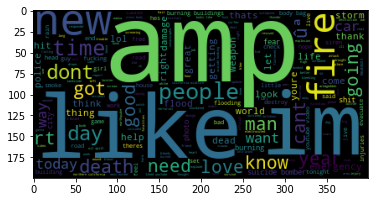

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

In [113]:
# liste des tokens uniques lemmatisé, et en retirant les stop_words
%%time
tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS]
vocabulary_set= set(tokens)
vocab_size = len(vocabulary_set)
print ( "Il y a {} mots différents dans l'ensemble des tweets".format(vocab_size))

Il y a 15793 mots différents dans l'ensemble des tweets
CPU times: user 165 ms, sys: 0 ns, total: 165 ms
Wall time: 167 ms


In [114]:
vocabulary_set

{'az',
 'cspanwj',
 'nugget',
 'emo',
 'palestinian',
 'huffpostrelig',
 'lasvegaslocally',
 'cut',
 'ieee',
 'wimbledon',
 'flex',
 'jail',
 'misdirection',
 'vimeo',
 'proliferation',
 'alska',
 'paramedic',
 'robbie',
 'necn',
 'telegraph',
 'franta',
 'massive',
 'ars',
 'frequent',
 'dominicana',
 'sprain',
 'soaker',
 'generalnews',
 'hopeinchrist',
 'stylish',
 'nineyearold',
 'saturate',
 'briefing',
 'govegan',
 'seismicsoftware',
 '20homers',
 'steep',
 'itsdanie',
 'dubbo',
 'dimension',
 'suho',
 'ur',
 'teenfiction',
 '\x89ûïa',
 'spså¨',
 'legal',
 'bakeofffriends',
 'shaabi',
 'ridiculously',
 'antony',
 'boise',
 'mineenjoyfire',
 'january',
 'cable',
 'decomposition',
 'uh',
 'western',
 'worldwide',
 'lubbock',
 'this\x89û',
 'yosemite',
 'daves',
 'antiblight',
 'marriedfoxysiren',
 '250k',
 'suspect',
 'trickshot',
 'mv',
 'newlywed',
 'remembrance',
 'office\x89ûªs',
 'wmata',
 'wannabe',
 'mi7',
 'lisavanderpump',
 'wave',
 'lgm',
 'petebest',
 'tgirl',
 '311',
 '

In [115]:
type(vocabulary_set)

set

In [0]:
# Création d'un nombre pour chacun des tokens que nous avons créés au dessus
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [117]:
# Regardons le résultat sur un exemple 
for example, _ in tf_ds.take(1):
  print(encoder.encode(example.numpy()))
  print(example.numpy())

[15794, 7257, 15794, 6780, 4105, 7330, 15794, 4091, 2233, 15794, 6826, 15794, 15794, 15794, 4728, 15794, 15794, 7330, 10546, 12347, 7064, 13569]
b'i agree with certain cultural appropriation things but honestly if u looked at my house it screams appropriation bc buddhas and stuff'


In [0]:
# Encodons maintenant tous les éléments d'un dataset
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

# Utilisation du fonction py_function pour encoder tout le dataset 
def encode_map_fn(text, label):
  return tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_data = tf_ds.map(encode_map_fn)

In [119]:
data_train_clean.shape[0]

7503

In [0]:
# Train Test Split
TAKE_SIZE = int(0.7*data_train_clean.shape[0])

train_data = all_encoded_data.take(TAKE_SIZE).shuffle(10000)
train_data = train_data.padded_batch(16,  padded_shapes=([-1], []))

test_data = all_encoded_data.skip(TAKE_SIZE)
test_data = test_data.padded_batch(16, padded_shapes=([-1], []))

In [121]:
 # Regardons un batch 
for text, target in train_data.take(1):
  print(text, target)

tf.Tensor(
[[  869   201  5122  5679 15794  7064 15794 12678 15794 15794 15794 11755
  11493 15436 15794 15794 15794 15794 15794  5126  4527   453     0     0
      0     0     0]
 [ 6534    95 10452 15794 12478  4039  7749  1814 15794  2965  1814 15794
   2965  6534 12541     0     0     0     0     0     0     0     0     0
      0     0     0]
 [ 2609 15794  7640   226 14778  5027 15794 15794  1353     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [15794 15794  8302 15794 15794 15794  5294 15794 15794 15794 15794  9650
  15794 15794 12337 15794 15794 10797 15794 11831  1554 11755   501 15794
  15794  1208     0]
 [ 7296  1720 14864   226 15794  7340  9602 14621     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [15794 15794 13362   308  7064  5533 10924 15794 15794 15794 15794   484
      0     0     0     0     0     0     0     0     0     0     0   

In [140]:
# Regardons un batch dans le test_data
for text, target in test_data.take(1):
  print(text, target)

tf.Tensor(
[[15794  3212 15794  1720  4704 15794 12684     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 9790 15794 15794  5679 15794   441 11755   173 15794 15794  7148  7047
  15794 11070  1191 15794 15794 15794     0     0     0     0     0     0
      0     0     0     0]
 [15794  3517  5968 15794 15794 12097  1914 15794  9913  3579 15794  2320
   6066 15794 12744     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2179 15794 15794 15794 15180 15794     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 6087 15794  3027  7836 15794 14607 15794 15794  1696  7397  7204 15794
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [15794 12327  3337 15794 15391  8526  2854  7185  6509 15794 15794 15794
  15794 11194  7064 15794 15794 15794   

In [0]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM Bidirectionnel
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec un neurone et une fonction d'activation sigmoide (Proba d'être un real disaster) 
                  tf.keras.layers.Dense(1, activation="sigmoid")
                                              
])

In [0]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2500,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])

In [149]:
# Entrainement du modèle 
history = model.fit(train_data, 
                    epochs=40, 
                    validation_data=test_data)

Epoch 1/40
329/329 [==============================] - 12s 35ms/step - loss: 0.6180 - binary_accuracy: 0.6538 - val_loss: 0.4538 - val_binary_accuracy: 0.8112
Epoch 2/40
329/329 [==============================] - 11s 33ms/step - loss: 0.4287 - binary_accuracy: 0.8153 - val_loss: 0.3529 - val_binary_accuracy: 0.8596
Epoch 3/40
329/329 [==============================] - 10s 32ms/step - loss: 0.3250 - binary_accuracy: 0.8740 - val_loss: 0.3058 - val_binary_accuracy: 0.8841
Epoch 4/40
329/329 [==============================] - 11s 32ms/step - loss: 0.2789 - binary_accuracy: 0.8955 - val_loss: 0.2286 - val_binary_accuracy: 0.9196
Epoch 5/40
329/329 [==============================] - 11s 33ms/step - loss: 0.2329 - binary_accuracy: 0.9158 - val_loss: 0.1779 - val_binary_accuracy: 0.9396
Epoch 6/40
329/329 [==============================] - 11s 33ms/step - loss: 0.1874 - binary_accuracy: 0.9341 - val_loss: 0.1367 - val_binary_accuracy: 0.9534
Epoch 7/40
329/329 [==============================] 

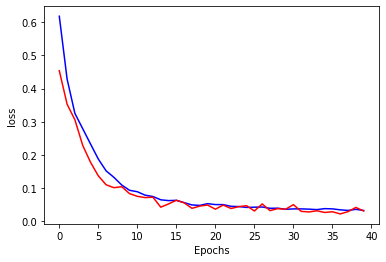

In [150]:
import matplotlib.pyplot as plt

# Visualisation du processus d'entrainement sur la loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

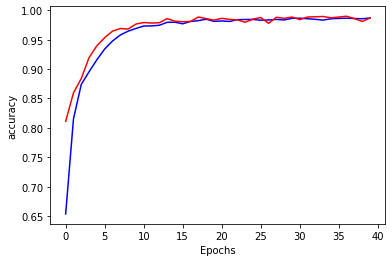

In [151]:
# Visualisation de l'entrainement sur l'accuracy 
plt.plot(history.history["binary_accuracy"], color="b")
plt.plot(history.history["val_binary_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [155]:
for example, _ in test_data.take(1):
  print(example, _)
  print(model.predict_classes(example))

tf.Tensor(
[[15461 15794 15058 15794 11755  7173 15794 15794  4285  9682     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [ 3852 15794 15794  8845  1696 11731  3358 15794  1225 15794  8874  3027
  14573     0     0     0     0     0     0     0     0     0     0]
 [15794  2483 10452 15794  7157  2679  7064 15794  5425  7891     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [10366   244  1006  9084    91  9536  9740  5950 11169 14075  9464 14529
      0     0     0     0     0     0     0     0     0     0     0]
 [ 2436 10737 14045 15794 12917 15794  2412 15794 15794 15794     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [ 1532 15794  1100 15794 15794 15794 15794 15794  9780  7172  8464 15794
   6251 15794 15794 15794  7891  7891 12262  3294  8261     0     0]
 [15615 15794  1564  5184  1931  1720 13795 13849 14499 15794     0     0
      0     0     0     0     0     0     0     0     0  

In [156]:
for example, label in test_data.take(1):
  print(encoder.decode(example.numpy()[0]))
  print("Prediction : {}".format(model.predict_classes(example)[0]))
  print("Real: {}".format(label[0]))

ted cruz UNK obama comparison gop to iranians UNK death to america tcot
Prediction : [1]
Real: 1


In [0]:
y_true = []
y_pred = []
for batch, true_labels in test_data.take(-1):
  y_true += [true_labels.numpy()]
  y_pred += [model.predict_classes(batch)]

In [0]:
y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()

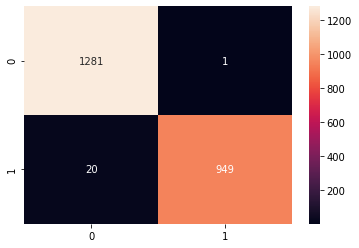

In [154]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
#
def most_confused(test_data, threshold):
  for example, labels in test_data.take(-1):
    y_pred = model.predict(example)
    mae = np.abs(y_pred.squeeze() - labels.numpy().squeeze())

    for i in np.where(mae>threshold)[0]:
     
      plt.title("prediction: {}\n MAE : {}".format(y_pred[i], mae[i]))
      


  
most_confused(test_data, 0.8)